In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amun = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')
Indian = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')
Pacific = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')
Ross = pd.read_excel(filepath, sheet_name='Ross-Extent-km^2')
Weddell = pd.read_excel(filepath, sheet_name='Weddell-Extent-km^2')

In [3]:
def month_mapping(df):
    month_mapping = {
    'Jan': 1, 'Feb': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12}

    df['Month'] = df['Month'].map(month_mapping)
    return(df)

def date_time(df):
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
    
    df.drop(['Year','Month'], axis=1, inplace=True)
    
    return(df)

In [4]:
month_mapping(Bell_Amun)
month_mapping(Indian)
month_mapping(Pacific)
month_mapping(Ross)
month_mapping(Weddell)

date_time(Bell_Amun)
date_time(Indian)
date_time(Pacific)
date_time(Ross)
date_time(Weddell)

,Extent,Date
0,2136510.859,1979-01-01
1,1243495.891,1979-02-01
2,1699053.449,1979-03-01
3,2617442.085,1979-04-01
4,3852934.206,1979-05-01
...,...,...
533,3668127.143,2023-06-01
534,4805519.784,2023-07-01
535,5524445.234,2023-08-01
536,6006669.861,2023-09-01


In [5]:
def quad_plot(axs,df):
    coefficients = np.polyfit(df['Extent'].index, df['Extent'], 2)
    polynomial = np.poly1d(coefficients)
    
    axs.plot(df['Date'], df['Extent'], label='Sea Ice Extent', linestyle='-')
    axs.plot(df['Date'], polynomial(df['Extent'].index), label='Trend Line', linestyle='--', color='red')
    axs.set_xlabel('Date')
    axs.set_ylabel('Sea Ice Extent')
    axs.legend()
    axs.grid(True)
    
def lin_plot(axs,df):
    coefficients = np.polyfit(df['Extent'].index, df['Extent'], 1)
    polynomial = np.poly1d(coefficients)
    
    axs.plot(df['Date'], df['Extent'], label='Sea Ice Extent', linestyle='-')
    axs.plot(df['Date'], polynomial(df['Extent'].index), label='Trend Line', linestyle='--', color='red')
    axs.set_xlabel('Date')
    axs.set_ylabel('Sea Ice Extent')
    axs.legend()
    axs.grid(True)

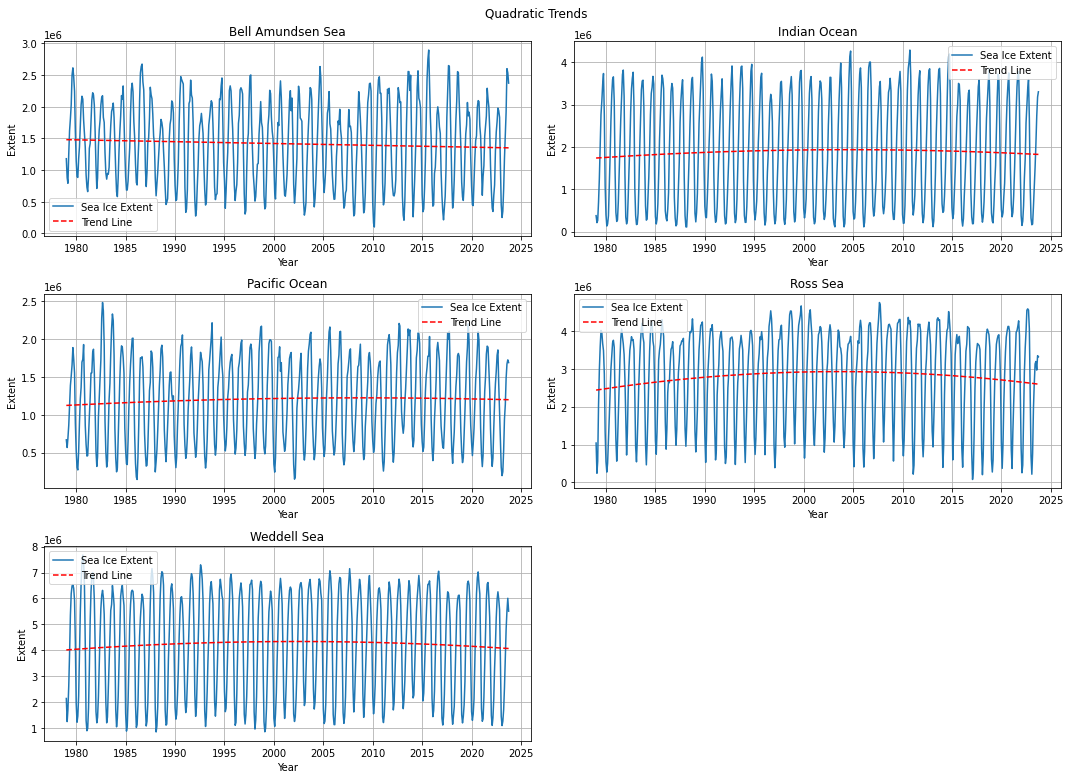

In [6]:
fig, axs = plt.subplots(3, 2,  figsize=(15, 11))

lin_plot(axs[0, 0], Bell_Amun)
quad_plot(axs[0, 1], Indian)
quad_plot(axs[1, 0], Pacific)
quad_plot(axs[1, 1], Ross)
quad_plot(axs[2,0], Weddell)

axs[0,0].set_title('Bell Amundsen Sea')
axs[0,1].set_title('Indian Ocean')
axs[1,0].set_title('Pacific Ocean')
axs[1,1].set_title('Ross Sea')
axs[2,0].set_title('Weddell Sea')

axs[2, 1].remove()

fig.suptitle('Quadratic Trends')
for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Extent')

plt.tight_layout()

plt.show()